In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.9.2


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#fashion mnist is a sample dataset
fm = tf.keras.datasets.fashion_mnist

(Xtr,ytr),(Xtst,ytst) = fm.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [7]:
Xtr.shape

(60000, 28, 28)

In [8]:
ytr.shape

(60000,)

In [9]:
np.unique(ytr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
classNames = ['tshirt', 'trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankleBoot']

In [11]:
classNames[ytr[19]]

'coat'

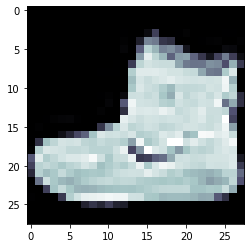

In [15]:
plt.figure()
plt.imshow(Xtr[0],cmap=plt.cm.bone)


In [16]:
classNames[ytr[0]]

'ankleBoot'

In [17]:
#scaling images from 0-1
Xtr = Xtr/255.0
Xtst = Xtst/255.0


In [18]:
#building neural network model
nnModel = tf.keras.Sequential([
    #inside sequential is the architecture of the model
    tf.keras.layers.Flatten(input_shape=(28,28)), #first layer

    tf.keras.layers.Dense(100,activation='relu'), #100 units of hidden layers
    tf.keras.layers.Dropout(0.2), #20% of dropout
    
    tf.keras.layers.Dense(60,activation='relu'), #60units of hidden layers
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(10), #output layers with 10 units

])


In [20]:
#compiling the model
nnModel.compile(optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [21]:
#training
nnModel.fit(Xtr,ytr,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5733 - accuracy: 0.7936
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4199 - accuracy: 0.8467
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3852 - accuracy: 0.8593
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3643 - accuracy: 0.8655
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3477 - accuracy: 0.8732
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3388 - accuracy: 0.8753
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3245 - accuracy: 0.8813
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3180 - accuracy: 0.8827
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3125 - accuracy: 0.8840
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.306

In [22]:
#prediction
#for prediction we add softmax layer
#probability model over last dense layer i.e. of 10 units (above)

#softmax normalizes all the values to probability distribution
probabilityModel = tf.keras.Sequential([nnModel,tf.keras.layers.Softmax()])

In [23]:

#making predictions
y_pred = probabilityModel.predict(Xtst)

313/313 [==============================] - 1s 2ms/step


In [24]:
y_pred[0]

array([3.3844887e-07, 7.3508409e-07, 6.4291605e-08, 1.6810346e-06,
       1.7244734e-07, 3.4586424e-03, 5.0963354e-07, 3.8968013e-03,
       4.1247691e-07, 9.9264055e-01], dtype=float32)

In [25]:
#finding out what is the class label
classLabel = np.argmax(y_pred[0])

In [27]:
classNames[classLabel] #model prediction

'ankleBoot'

In [28]:
classNames[ytst[0]] #actual classlabel on test data

'ankleBoot'

In [31]:
#checking another random index
classLabel = np.argmax(y_pred[10])

In [32]:
classNames[classLabel] #model prediction

'coat'

In [33]:
classNames[ytst[10]] #actual classlabel on test data

'coat'

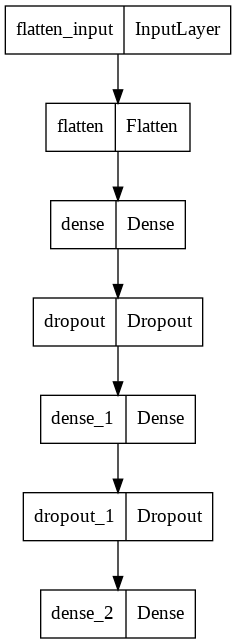

In [35]:
tf.keras.utils.plot_model(
    nnModel,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)